In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('studentmath.csv')

In [3]:
def assign_cat_codes(df, col_name):
    col_index = df.columns.get_loc(col_name)
    df[col_name] = df[col_name].astype('category')
    df.insert(col_index + 1, f'{col_name}_cat', df[col_name].cat.codes)
    df.drop(columns=[col_name], inplace=True)
    
columns_to_convert = ['school', 'sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

for col in columns_to_convert:
    assign_cat_codes(df, col)
    

In [4]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
# Perform RFE with cross-validation
rfe_cv = RFECV(RandomForestRegressor(n_estimators=100, random_state=0), scoring='neg_mean_absolute_error', cv=10)
rfe_cv.fit(X, y)

# Get the optimal number of features
optimal_n = rfe_cv.n_features_
print('Optimal number of features:', optimal_n)

# Get the mask of selected features
selected_features_mask = rfe_cv.support_

# Print the selected feature names
selected_feature_names = np.array(X.columns)[selected_features_mask]
print("Selected features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features_mask]

X= X_selected


Optimal number of features: 5
Selected features: ['age' 'famrel' 'health' 'absences' 'G2']


In [10]:
for index, column_name in enumerate(df.columns):
    print(f'Column number {index}: {column_name}')

Column number 0: school_cat
Column number 1: sex_cat
Column number 2: age
Column number 3: address_cat
Column number 4: famsize_cat
Column number 5: Pstatus_cat
Column number 6: Medu
Column number 7: Fedu
Column number 8: Mjob_cat
Column number 9: Fjob_cat
Column number 10: reason_cat
Column number 11: guardian_cat
Column number 12: traveltime
Column number 13: studytime
Column number 14: failures
Column number 15: schoolsup_cat
Column number 16: famsup_cat
Column number 17: paid_cat
Column number 18: activities_cat
Column number 19: nursery_cat
Column number 20: higher_cat
Column number 21: internet_cat
Column number 22: romantic_cat
Column number 23: famrel
Column number 24: freetime
Column number 25: goout
Column number 26: Dalc
Column number 27: Walc
Column number 28: health
Column number 29: absences
Column number 30: G1
Column number 31: G2
Column number 32: G3


In [5]:
X

,age,famrel,health,absences,G2
0,18,4,3,6,6
1,17,5,3,4,5
2,15,4,3,10,8
3,15,3,5,2,14
4,16,4,5,4,10
...,...,...,...,...,...
390,20,5,4,11,9
391,17,2,2,3,16
392,21,5,3,3,8
393,18,4,5,0,12


Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459
Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702
Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667
Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667
Column: famre

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596
Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237
Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459
Column: famrel, Value: 4, Mean: 10.3954802259887

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va


Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143
Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702
Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 1

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va


Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705
Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667
Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596
Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237
Column: famrel, Value: 4, Mean: 10

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459
Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143
Column: famrel, Value: 4, Mean: 10.

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667
Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.325714285714286
Column: famrel, Value: 5, Mean: 10.979591836734693
Column: famrel, Value: 3, Mean: 9.728813559322035
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.133333333333333
Column: health, Value: 3, Mean: 9.8625
Column: health, Value: 5, Mean: 10.451127819548873
Column: health, Value: 1, Mean: 11.902439024390244
Column: health, Value: 2, Mean: 9.928571428571429
Column: health, Value: 4, Mean: 10.338983050847459


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.3954802259887
Column: famrel, Value: 3, Mean: 10.206349206349206
Column: famrel, Value: 5, Mean: 10.673913043478262
Column: famrel, Value: 1, Mean: 12.142857142857142
Column: famrel, Value: 2, Mean: 10.625
Column: health, Value: 3, Mean: 10.094117647058823
Column: health, Value: 5, Mean: 10.435114503816793
Column: health, Value: 1, Mean: 11.886363636363637
Column: health, Value: 4, Mean: 10.4
Column: health, Value: 2, Mean: 9.942857142857143


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.32768361581921
Column: famrel, Value: 5, Mean: 11.138297872340425
Column: famrel, Value: 3, Mean: 10.442622950819672
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.8
Column: health, Value: 3, Mean: 10.178571428571429
Column: health, Value: 5, Mean: 10.462121212121213
Column: health, Value: 1, Mean: 11.568181818181818
Column: health, Value: 2, Mean: 11.105263157894736
Column: health, Value: 4, Mean: 10.385964912280702


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.303370786516854
Column: famrel, Value: 5, Mean: 10.882978723404255
Column: famrel, Value: 3, Mean: 9.94915254237288
Column: famrel, Value: 1, Mean: 9.5
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 10.0
Column: health, Value: 5, Mean: 10.328125
Column: health, Value: 1, Mean: 12.073170731707316
Column: health, Value: 2, Mean: 10.075
Column: health, Value: 4, Mean: 9.98360655737705


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.428571428571429
Column: famrel, Value: 5, Mean: 10.947368421052632
Column: famrel, Value: 3, Mean: 10.169230769230769
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 8.461538461538462
Column: health, Value: 3, Mean: 9.975308641975309
Column: health, Value: 5, Mean: 10.51937984496124
Column: health, Value: 1, Mean: 12.093023255813954
Column: health, Value: 2, Mean: 9.761904761904763
Column: health, Value: 4, Mean: 10.216666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.535911602209945
Column: famrel, Value: 5, Mean: 10.885416666666666
Column: famrel, Value: 3, Mean: 9.946428571428571
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 10.0
Column: health, Value: 3, Mean: 10.342105263157896
Column: health, Value: 5, Mean: 10.654135338345865
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.13953488372093
Column: health, Value: 4, Mean: 9.766666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.382857142857143
Column: famrel, Value: 5, Mean: 10.414893617021276
Column: famrel, Value: 3, Mean: 9.774193548387096
Column: famrel, Value: 1, Mean: 10.428571428571429
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: health, Value: 3, Mean: 9.679012345679013
Column: health, Value: 5, Mean: 10.333333333333334
Column: health, Value: 1, Mean: 11.795454545454545
Column: health, Value: 2, Mean: 10.525
Column: health, Value: 4, Mean: 9.576271186440678


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 5, Mean: 10.717171717171718
Column: famrel, Value: 4, Mean: 10.397660818713451
Column: famrel, Value: 3, Mean: 10.112903225806452
Column: famrel, Value: 1, Mean: 10.285714285714286
Column: famrel, Value: 2, Mean: 9.470588235294118
Column: health, Value: 3, Mean: 9.7625
Column: health, Value: 5, Mean: 10.426470588235293
Column: health, Value: 1, Mean: 11.974358974358974
Column: health, Value: 2, Mean: 10.227272727272727
Column: health, Value: 4, Mean: 10.228070175438596


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.152046783625732
Column: famrel, Value: 5, Mean: 11.0
Column: famrel, Value: 3, Mean: 10.016129032258064
Column: famrel, Value: 1, Mean: 10.625
Column: famrel, Value: 2, Mean: 9.588235294117647
Column: health, Value: 3, Mean: 10.119047619047619
Column: health, Value: 5, Mean: 10.129770992366412
Column: health, Value: 1, Mean: 12.05
Column: health, Value: 2, Mean: 10.19047619047619
Column: health, Value: 4, Mean: 10.101694915254237


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: famrel, Value: 4, Mean: 10.331428571428571
Column: famrel, Value: 5, Mean: 10.648936170212766
Column: famrel, Value: 3, Mean: 10.063492063492063
Column: famrel, Value: 2, Mean: 9.88888888888889
Column: famrel, Value: 1, Mean: 11.0
Column: health, Value: 3, Mean: 10.096385542168674
Column: health, Value: 5, Mean: 10.224806201550388
Column: health, Value: 1, Mean: 11.627906976744185
Column: health, Value: 2, Mean: 10.384615384615385
Column: health, Value: 4, Mean: 10.080645161290322


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-53707978a4ee>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-6-53707978a4ee>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

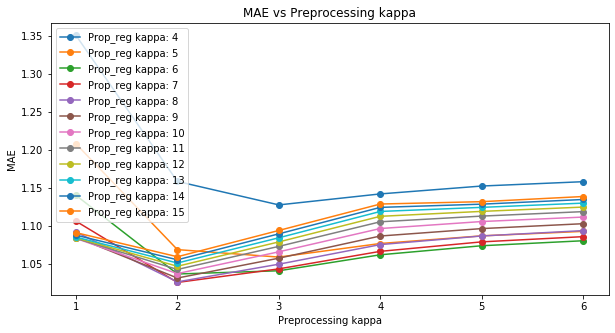

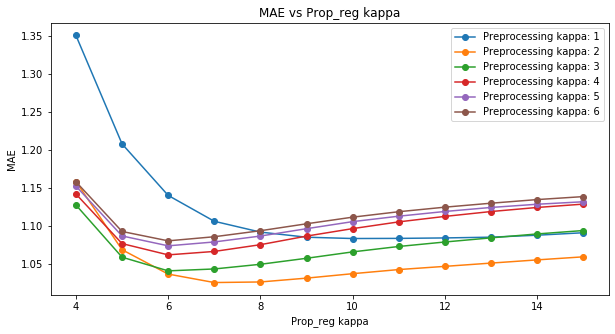

Optimal Preprocessing kappa: 2
Optimal Prop_reg kappa: 7
Minimum MAE: 1.0256352369480708


In [6]:
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



ordinal_columns = ['G2', 'absences', 'age']

kappa_values_preprocessing = [1,2,3,4,5,6]
kappa_values_prop_reg = [4,5,6,7,8,9,10,11,12,13,14,15]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)



# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


In [7]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print(f"Preprocessing kappa: {kappa_preprocessing}, Prop_reg kappa: {kappa_prop_reg}, MAE: {mae}")
    

Kappa combinations and their MAE values:
Preprocessing kappa: 1, Prop_reg kappa: 4, MAE: 1.3504351951441067
Preprocessing kappa: 1, Prop_reg kappa: 5, MAE: 1.2078558562240262
Preprocessing kappa: 1, Prop_reg kappa: 6, MAE: 1.1401684588880836
Preprocessing kappa: 1, Prop_reg kappa: 7, MAE: 1.106152844713572
Preprocessing kappa: 1, Prop_reg kappa: 8, MAE: 1.0919414557214295
Preprocessing kappa: 1, Prop_reg kappa: 9, MAE: 1.0852151542656763
Preprocessing kappa: 1, Prop_reg kappa: 10, MAE: 1.0835003143099091
Preprocessing kappa: 1, Prop_reg kappa: 11, MAE: 1.0836687856196372
Preprocessing kappa: 1, Prop_reg kappa: 12, MAE: 1.0842767137889437
Preprocessing kappa: 1, Prop_reg kappa: 13, MAE: 1.0852722327416124
Preprocessing kappa: 1, Prop_reg kappa: 14, MAE: 1.0878418317698677
Preprocessing kappa: 1, Prop_reg kappa: 15, MAE: 1.0911019033318246
Preprocessing kappa: 2, Prop_reg kappa: 4, MAE: 1.1584048055215526
Preprocessing kappa: 2, Prop_reg kappa: 5, MAE: 1.0687833128045405
Preprocessing ka

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)


1.5291502976190476
1.7169642857142857
1.8675000000000002
1.8035741832373398


In [9]:
X

,age,famrel,health,absences,G2
0,18,4,3,6,6
1,17,5,3,4,5
2,15,4,3,10,8
3,15,3,5,2,14
4,16,4,5,4,10
...,...,...,...,...,...
390,20,5,4,11,9
391,17,2,2,3,16
392,21,5,3,3,8
393,18,4,5,0,12
